# Tutorial Notebook for UN Datathon Participants 🌐 🔐


This notebook is designed to acquaint participants of the UN datathon with antigranular, which is your private data exploration toolkit, and showcase its main functions!

## What is Antigranular?

With Antigranular, you can use Python to securely explore and gain insights from your data without ever seeing sensitive information. 🕵️‍♂️🔐

Antigranular leverages AWS enclaves, which are isolated and protected environments that run on the cloud. AWS enclaves ensure that your data and code are safe from unauthorised access, even from AWS itself. 🛡️☁️

Antigranular also integrates with powerful differential privacy libraries, such as OpenDP, SmartNoise, and DiffPrivLib. Differential privacy is a technique that adds controlled noise to your data analysis, preserving the privacy of individual records while still allowing you to draw meaningful conclusions. 📊🔇

With Antigranular, you can work with private sensitive datasets conveniently, knowing that your data analysis remains confidential and insightful! 😊👍

## How to Use antigranular?


### Install the Package 📦

First, we need to add antigranular to our local jupyter kernel. You can do this by installing it directly from PyPI, which is like an app store but for python packages!


In [ ]:
!pip install antigranular

### Using Antigranular for Secure Computations 🔐

Now that you're connected, your ag.login initiates a secure session with Antigranular where we can work with our data confidentially.

See the the %%ag at the beginning of a cell? It indicates that the code within this cell will be executed securely on the Antigranular platform, ensuring the confidentiality of our computations. Like magic! 😍

In [4]:
import antigranular as ag
session = ag.login(<client_id>,<client_secret>, competition = "UN Datathon PETs Track")

Connected to Antigranular server session id: e3890b5d-4b0b-413d-aa07-cb7130efe5c0, the session will time out if idle for 60 minutes
Cell magic '%%ag' registered successfully, use `%%ag` in a notebook cell to execute your python code on Antigranular private python server
🚀 Everything's set up and ready to roll!


🔑 Note: Replace `<client_id>`, `<client_secret>`, with actual values that you will get from antigranular.com to get connected.

🔐 Ensure to substitute `<client_id>` and `<client_secret>` with your respective Antigranular credentials.

## Loading the Data 🚀

For this datathon, we possess an extensive private dataset, which we have divided into 19 separate smaller datasets. This division allows for each dataset to be loaded individually, promoting swifter execution times, so there's nothing holding you back. 💥

The [op_pandas](https://docs.antigranular.com/private-python/packages/pandas) library includes functionality for merging and joining two datasets, enabling the combination of multiple datasets.

You can load two datasets by using `load_dataset` functionality, which returns an `op_pandas.PrivateDataFrame` object.

In [5]:
%%ag
undata_ls = load_dataset("undata_ls")
undata_ls_dif = load_dataset("undata_ls_dif")

Dataset "undata_ls" loaded to the kernel as undata_ls

Dataset "undata_ls_dif" loaded to the kernel as undata_ls_dif



## Checking the Privacy Budget 🤑

Privacy-preserving algorithms used by libraries often consume a "privacy budget" to ensure that data privacy is maintained. Here's how you can check your spending:

In [6]:
session.privacy_odometer()

{'total_epsilon_used': 13.000099999999984,
 'total_delta_used': 0.0,
 'library_costs': {'op_pandas': {'total_delta': 0,
   'total_epsilon': 13.000099999999984,
   'total_requests': 20}},
 'dataset_costs': {'undata_ls': {'delta': 0, 'eps': 7.00009999999999},
  'undata_ls_dif': {'delta': 0, 'eps': 5.999999999999993}}}

## Viewing Data 🔍

To protect privacy, records in PrivateDataFrame and PrivateSeries cannot be viewed directly. But that doesn't mean you can't see anything! 👀 You can still analyse and obtain statistical information about the data using methods that offer differential privacy guarantees.


### Viewing Details About the Data

`ag_print` is a function packaged within Antigranular which can be used to print objects from the ag environment.

Here's how you can print the details about the data, like `columns` and `metadata`:

In [7]:
%%ag

ag_print("undata_ls Details: \n")
ag_print("Columns: \n", undata_ls.columns)
ag_print("Metadata: \n", undata_ls.metadata)
ag_print("Dtypes: \n", undata_ls.dtypes)

undata_ls Details: 

Columns: 
 ['objectid', 'ls_main', 'ls_num_lastyr', 'ls_num_now', 'ls_num_diff', 'ls_num_increased', 'ls_num_decreased', 'ls_num_no_change', 'ls_num_inc_less_sales', 'ls_num_inc_more_birth', 'ls_num_inc_more_acquired', 'ls_num_inc_received_free', 'ls_num_dec_poor_health', 'ls_num_dec_death', 'ls_num_dec_sales_good_price', 'ls_num_dec_sales_distress', 'ls_num_dec_escape_stolen', 'ls_num_dec_consumed', 'ls_num_inc_dec_other', 'ls_num_inc_dec_dk', 'ls_num_inc_dec_ref', 'ls_feed_open_pasture', 'ls_feed_common_pasture', 'ls_feed_self_produced', 'ls_feed_purchased', 'ls_feed_free_dist', 'ls_feed_other', 'ls_feed_dk', 'ls_feed_ref']
Metadata: 
 {'objectid': (3496, 239871), 'ls_main': (1.0, 999.0), 'ls_num_lastyr': (0.0, 200000.0), 'ls_num_now': (0.0, 200000.0), 'ls_num_diff': (-99955.0, 18000.0), 'ls_num_increased': (0.0, 1.0), 'ls_num_decreased': (0.0, 1.0), 'ls_num_no_change': (0.0, 1.0), 'ls_num_inc_less_sales': (0.0, 1.0), 'ls_num_inc_more_birth': (0.0, 1.0), 'ls_num_

In [8]:
%%ag

ag_print("undata_ls_dif Details: \n")
ag_print("Columns: \n", undata_ls_dif.columns)
ag_print("Metadata: \n", undata_ls_dif.metadata)
ag_print("Dtypes: \n", undata_ls_dif.dtypes)

undata_ls_dif Details: 

Columns: 
 ['objectid', 'ls_proddif', 'ls_proddif_feed_purchase', 'ls_proddif_access_pasture', 'ls_proddif_access_water', 'ls_proddif_vet_serv', 'ls_proddif_vet_input', 'ls_proddif_diseases', 'ls_proddif_theft', 'ls_proddif_access_market', 'ls_proddif_access_credit', 'ls_proddif_access_labour', 'ls_proddif_other', 'ls_proddif_dk', 'ls_proddif_ref', 'ls_salesmain', 'ls_salesdif', 'ls_salesdif_marketing_cost', 'ls_salesdif_damage_losses', 'ls_salesdif_low_demand', 'ls_salesdif_pay_delay', 'ls_salesdif_low_price', 'ls_salesdif_slaughterhouse', 'ls_salesdif_processing', 'ls_salesdif_competition', 'ls_salesdif_other', 'ls_salesdif_dk', 'ls_salesdif_ref', 'ls_salesprice']
Metadata: 
 {'objectid': (3496, 239871), 'ls_proddif': (0.0, 999.0), 'ls_proddif_feed_purchase': (0.0, 1.0), 'ls_proddif_access_pasture': (0.0, 1.0), 'ls_proddif_access_water': (0.0, 1.0), 'ls_proddif_vet_serv': (0.0, 1.0), 'ls_proddif_vet_input': (0.0, 1.0), 'ls_proddif_diseases': (0.0, 1.0), 'ls_p

`metadata` denotes the bounds of numerical data.

### Quick Statistics 📊

One way to obtain the quick-statistic is by using the `describe()` method. You can spend some epsilon and obtain a rough meta-data about the dataset to give you a quick overview.



In [9]:
%%ag

undata_ls_describe = undata_ls.describe(eps=1)
ag_print("undata_ls Describe:\n", undata_ls_describe)

undata_ls_dif_describe = undata_ls_dif.describe(eps=1)
ag_print("undata_ls Describe:\n", undata_ls_describe)

undata_ls Describe:
             objectid        ls_main  ...     ls_feed_dk    ls_feed_ref
count  105851.000000  105851.000000  ...  105851.000000  105851.000000
mean    92563.143386      12.217848  ...       0.000741       0.004680
std     74418.552416      41.761065  ...       0.033732       0.061635
min      3755.273505       1.245000  ...       0.000000       0.000000
25%     30889.229585       1.981209  ...       0.001340       0.000064
50%     61496.226676       2.432038  ...       0.000274       0.000420
75%    146252.951592       3.802322  ...       0.005518       0.000007
max    239673.092181     300.410041  ...       0.570977       0.897902

[8 rows x 29 columns]

undata_ls Describe:
             objectid        ls_main  ...     ls_feed_dk    ls_feed_ref
count  105851.000000  105851.000000  ...  105851.000000  105851.000000
mean    92563.143386      12.217848  ...       0.000741       0.004680
std     74418.552416      41.761065  ...       0.033732       0.061635
min      37

You can view the statistics by exporting the non-private result to the local Jupyter server using the `export` method:

In [10]:
%%ag

export(undata_ls_describe, name='undata_ls_describe')

Setting up exported variable in local environment: undata_ls_describe


Now, we can access undata_ls_describe in our local jupyter environment.

In [11]:
print(undata_ls_describe)

            objectid        ls_main  ls_num_lastyr     ls_num_now  \
count  105851.000000  105851.000000  105851.000000  105851.000000   
mean    92563.143386      12.217848      70.262404       0.000000   
std     74418.552416      41.761065   14479.746286    6719.282786   
min      3755.273505       1.245000       0.751785       0.807357   
25%     30889.229585       1.981209       3.472082       2.501324   
50%     61496.226676       2.432038       8.034055       5.786683   
75%    146252.951592       3.802322      22.621941      13.675972   
max    239673.092181     300.410041  129833.923845   33217.916370   

         ls_num_diff  ls_num_increased  ls_num_decreased  ls_num_no_change  \
count  105851.000000     105851.000000     105851.000000     105851.000000   
mean      410.417330          0.255759          0.606697          0.143253   
std     10485.700024          0.444531          0.494017          0.361893   
min      -412.660360          0.000000          0.000000          

## Data Preprocessing 🌐

### Importing External Data

Guess what? You can also import any external data, merge it with the data provided to get some inferences.

Here is an example on how to do that:

In [12]:
'''
Creating mock data

Mock data will just be 100 rows of age and salary information
'''

import pandas as pd
import numpy as np

n_num = 100
df = pd.DataFrame({'age': np.random.randint(0, 80, n_num), 'salary': np.random.randint(100, 100000, n_num)})
session.private_import(data = df, name= 'imported_df')

dataframe cached to server, loading to kernel...
Dataframe loaded successfully to the kernel



In [13]:
%%ag
# Creating a PrivateDataFrame out of the DataFrame imported.
import op_pandas

metadata = {
    'age': (0, 80),
    'salary': (1, 200000)
}

priv_df = op_pandas.PrivateDataFrame(imported_df ,metadata = metadata)

In [14]:
%%ag

ag_print("Private DataFrame Describe:\n", priv_df.describe(eps=1))

Private DataFrame Describe:
               age         salary
count  111.000000     111.000000
mean    56.551771   31638.577272
std     19.796483   48840.041708
min      0.000000   20486.014842
25%     43.758095   20077.071125
50%     69.462639   53808.131381
75%     71.429344   85748.972988
max     72.660528  119740.808988



Now that `priv_df` is within the ag environment, you can do any operation with the original data and extract inferences.

### Combining Datasets: `undata_ls` and `undata_ls_dif`

To facilitate certain analyses and visualisations, it might be useful to combine our two datasets (`undata_ls` and `undata_ls_dif`) into a single dataset.

This can allow us to explore relationships between features more efficiently. 🤝🏼

In [15]:
%%ag

import op_pandas

joined_data = op_pandas.merge(undata_ls, undata_ls_dif, on="objectid")

ag_print("Joined Data Columns: \n", joined_data.columns)

Joined Data Columns: 
 ['objectid', 'ls_main', 'ls_num_lastyr', 'ls_num_now', 'ls_num_diff', 'ls_num_increased', 'ls_num_decreased', 'ls_num_no_change', 'ls_num_inc_less_sales', 'ls_num_inc_more_birth', 'ls_num_inc_more_acquired', 'ls_num_inc_received_free', 'ls_num_dec_poor_health', 'ls_num_dec_death', 'ls_num_dec_sales_good_price', 'ls_num_dec_sales_distress', 'ls_num_dec_escape_stolen', 'ls_num_dec_consumed', 'ls_num_inc_dec_other', 'ls_num_inc_dec_dk', 'ls_num_inc_dec_ref', 'ls_feed_open_pasture', 'ls_feed_common_pasture', 'ls_feed_self_produced', 'ls_feed_purchased', 'ls_feed_free_dist', 'ls_feed_other', 'ls_feed_dk', 'ls_feed_ref', 'ls_proddif', 'ls_proddif_feed_purchase', 'ls_proddif_access_pasture', 'ls_proddif_access_water', 'ls_proddif_vet_serv', 'ls_proddif_vet_input', 'ls_proddif_diseases', 'ls_proddif_theft', 'ls_proddif_access_market', 'ls_proddif_access_credit', 'ls_proddif_access_labour', 'ls_proddif_other', 'ls_proddif_dk', 'ls_proddif_ref', 'ls_salesmain', 'ls_salesdi

Using `merge` method, we merge the two PrivateDataFrames.

## Data Visualisation 🤩

The next function in your arsenal is data visualisation. This is a pivotal step in exploratory data analysis. By visualising our data, we can observe patterns, anomalies, and relationships between variables that might not be apparent from the raw data alone.


### Exploring the Data Using `histograms`

We can visualise different columns using differentially private `histograms`.

In [16]:
%%ag

hist_data = joined_data.hist(column='ls_salesprice',eps=1)
export(hist_data , 'hist_data')

Setting up exported variable in local environment: hist_data


To visualise the histogram locally, you can use matplotlib or any other plotting library of your choice.

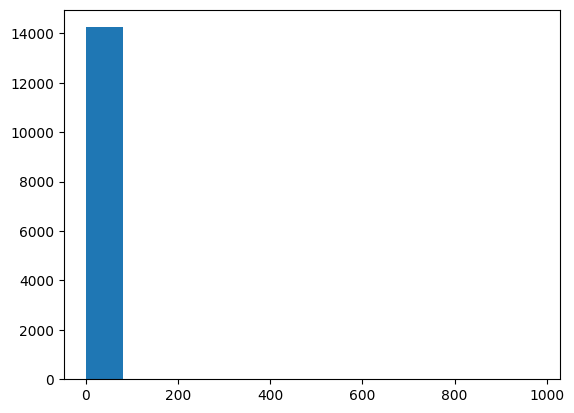

In [17]:
import matplotlib.pyplot as plt
dp_hist, dp_bins = hist_data
# Create a bar plot using Matplotlib
plt.bar(dp_bins[:-1], dp_hist, width=np.diff(dp_bins)*0.8, align='edge')

# Display the plot
plt.show()

### Splitting the Data

You can use `op_pandas.train_test_split` to split the data into `training` and `testing` parts randomly to train any of the models provided in `op_diffprivlib`.

Here is an example on how to remove some columns from the data, and split the rest into `training` and `testing` parts.

In [18]:
%%ag
# removing 'ls_num_dec_poor_health' and 'ls_num_dec_death' from the joined dataset.

joined_data.drop(['ls_num_dec_poor_health', 'ls_num_dec_death'])

train_data, test_data = op_pandas.train_test_split(joined_data)

ag_print("Train Data Description: \n", train_data.describe(eps = 1))
ag_print("Test Data Description: \n", test_data.describe(eps = 1))

Train Data Description: 
             objectid       ls_main  ...  ls_salesdif_ref  ls_salesprice
count   72352.000000  72352.000000  ...     72352.000000   72352.000000
mean    87988.876779      4.655657  ...         0.003786       9.027744
std     79531.722756     93.544084  ...         0.075379      58.820844
min      3618.278977      1.855115  ...         0.000000       1.660363
25%     26907.830870      1.129515  ...         0.026976       1.866601
50%     57571.192170      2.692742  ...         0.043226     864.055666
75%    148222.883276      4.351777  ...         0.365840     846.517427
max    237128.233742    432.368765  ...         0.905166     902.662656

[8 rows x 55 columns]

Test Data Description: 
             objectid       ls_main  ...  ls_salesdif_ref  ls_salesprice
count   23657.000000  23657.000000  ...     23657.000000   23657.000000
mean    81684.521851      1.000000  ...         0.001300       1.000000
std     88998.616803     26.170856  ...         0.198714     

Now you can train any model from `op_diffprivlib`.

Now that we are all done, we can terminate the session. Happy coding! 😎

In [19]:
session.terminate_session()

{'status': 'ok'}